In [ ]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [ ]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [ ]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))


Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


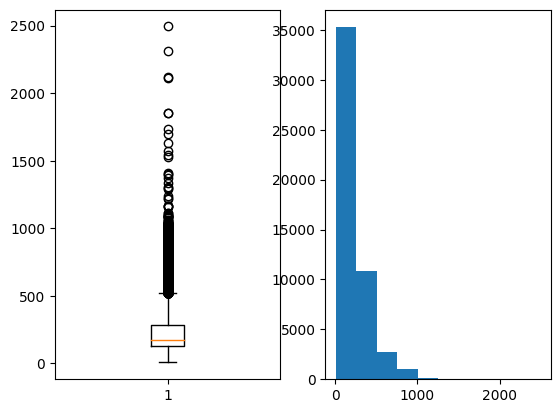

In [ ]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length as a boxplot and histogram
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.utils import pad_sequences
seed = 7
numpy.random.seed(seed)


In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,
verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 [==============================] - 30s 148ms/step - loss: 0.4661 - accuracy: 0.7489 - val_loss: 0.2921 - val_accuracy: 0.8771
Epoch 2/2
196/196 [==============================] - 29s 147ms/step - loss: 0.1663 - accuracy: 0.9387 - val_loss: 0.3165 - val_accuracy: 0.8713
Accuracy: 87.13%


In [ ]:
# One-Dimensional Convolutional Neural Network
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model2 = Sequential()
model2.add(Embedding(top_words, 32, input_length=max_words))
model2.add(Conv1D(filters=32, kernel_size=3, padding= 'same' , activation= 'relu' ))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(250, activation= 'relu' ))
model2.add(Dense(1, activation= 'sigmoid' ))
model2.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 8000)              0         
                                                                 
 dense_2 (Dense)             (None, 250)               2000250   
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                      

In [ ]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,
verbose=2)
# Final evaluation of the model
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 - 36s - loss: 0.4541 - accuracy: 0.7528 - val_loss: 0.2723 - val_accuracy: 0.8869 - 36s/epoch - 182ms/step
Epoch 2/2
196/196 - 35s - loss: 0.2098 - accuracy: 0.9186 - val_loss: 0.2864 - val_accuracy: 0.8814 - 35s/epoch - 176ms/step
Accuracy: 88.14%
